In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from random import random, seed
import seaborn as sns

## Should we be making more calls to persuade a customer in purchasing a subscription or should we restrict making just a few calls to remind customers about the term subscription. We will be performing an A/B test below to see which option is better for the business

In [2]:
#importing a baning dataset from kaggle, using the lenk below
#https://www.kaggle.com/henriqueyamahata/bank-marketing
banking = pd.read_csv('bank-additional-full.csv', sep = ';')
#Getting to know the data
print(banking.head())
print(banking.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
# We are interested in number of campaign calls variable, and looking for missing values in campaign variable
banking['campaign'].isnull().sum()

0

## Dividing the data into two data sets subscribed data and unsubscribed data 

In [4]:
banking_notsub = banking[banking['y']== 'no']
print(len(banking_notsub))
banking_sub = banking[banking['y']== 'yes']
print(len(banking_sub))

36548
4640


In [5]:
#Converting categorical variable y into 1's and zeroes
X = banking.iloc[:,:].values
labelencoder_X = LabelEncoder()
X[:, 20] = labelencoder_X.fit_transform(X[:,20])
new =pd.DataFrame(X)
new.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [6]:
#it appears that campaign(number of calls) is 11th column in new dataset
new[11].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25,
       16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30,
       41, 37, 40, 33, 34, 43], dtype=object)

In [7]:
#creating a dataset with calls less than or equal to 5
calls_lessorequalto5 = new[new[11] <= 5]
print(len(calls_lessorequalto5))
print()

37803



In [8]:
#creating a dataset with calls more than 5
calls_more_than_5 = new[new[11] > 5]
len(calls_more_than_5)

3385

In [9]:
#less than 5 subscribing rate
print('Less than 5 calls made and the subscription rate is:' , calls_lessorequalto5[20].mean())

Less than 5 calls made and the subscription rate is: 0.11782133693093141


In [10]:
#More than 5 calls made 
print('More than 5 calls made and the subscription rate is :', calls_more_than_5[20].mean())

More than 5 calls made and the subscription rate is : 0.054948301329394385


## it looks like the subscription rate is almost half, if we called the clients more than 5 times

## Plotting a histogram below for data less than 5 calls and more than 5 calls

Text(0.5, 1.0, 'Histogram for checking normality for calls less than 5')

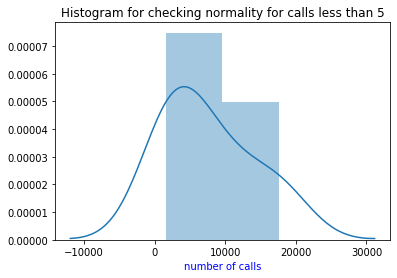

In [11]:
sns.distplot(calls_lessorequalto5[11].value_counts(), norm_hist= True)
plt.xlabel('number of calls', color ='blue')
plt.title("Histogram for checking normality for calls less than 5")


Text(0.5, 1.0, 'Normality check for calls more than 5 data')

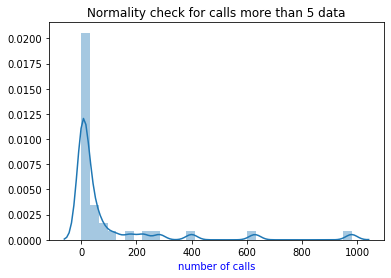

In [12]:
sns.distplot(calls_more_than_5[11].value_counts(), norm_hist = True)
plt.xlabel("number of calls", color = 'blue')
plt.title("Normality check for calls more than 5 data")

In [15]:
print(stats.describe(calls_lessorequalto5[20]))
print(stats.describe(calls_more_than_5[20]))

DescribeResult(nobs=37803, minmax=(0, 1), mean=0.11782133693093141, variance=0.10394221907067352, skewness=2.3708615016460066, kurtosis=3.6209842599847963)
DescribeResult(nobs=3385, minmax=(0, 1), mean=0.054948301329394385, variance=0.05194433095530135, skewness=3.9060296851051235, kurtosis=13.257067900922603)


## Looking at above plots, it is clear that the data is not normally distributed. Performing a non parametric test below

In [16]:
stats.kruskal(calls_lessorequalto5[20], calls_more_than_5[20])

KruskalResult(statistic=122.85486547324194, pvalue=1.5003168555201254e-28)

## Based on the p-value, we can reject the null that all variables have the same distribution.

## We should also consider, what is the purpose of calling the client and did the CSR speak to the client about a subscription or was the call about other purposes is something we should also look into for further analysis. We are assuming that all the calls are made for persuading the clients to purchase a susbcription, we can reduce the bias by including a variable 'Purpose of call'. Further analysis should also include any other form of reaching out to customers such as emails to get better results. I have also done tha analysis on Marital variable and the categories single, divorced and married does not have a significant difference on the rate of subscriptions. Other variables like Education, Loan, Defaulting, Housing can also be studied to get further insights. My analysis is only confined to how the number of calls influenced the subscriptions.

## Although, there are lot of other potential variables which may influence th clients in purchasing a subscription. Looking at only one variable, campaign calls clearly indicate that making 5 or less calls has higher rate of subscription than making more than 5 calls. After performing the above tests we can say that  Businesses should also look at an alternative way of contacting clients such as emails, because, clients may not find emails annoying as they can read the emails at their own time.